**Defuzzifikasi**

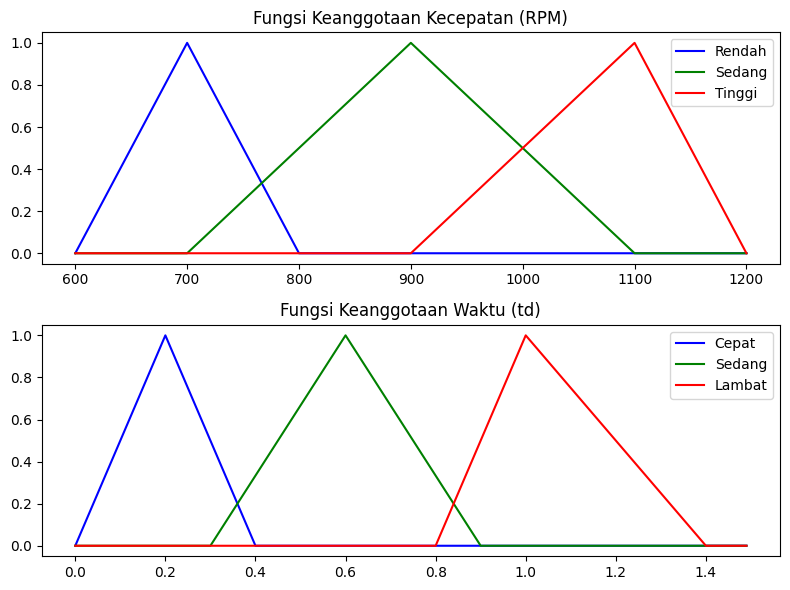

RPM Input: 900
Hasil Defuzzifikasi Waktu (td): 0.6000 s


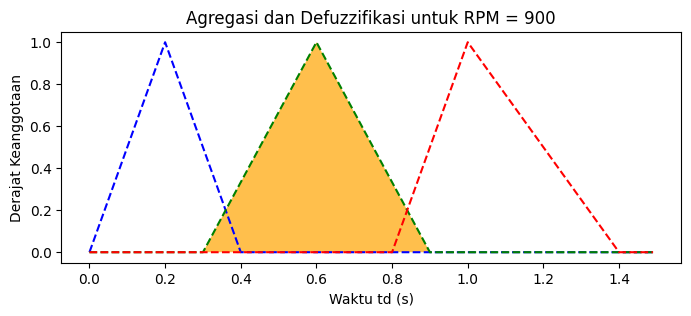

In [ ]:
# ======================================
# Implementasi Logika Fuzzy Metode Mamdani
# Studi Kasus: Pengaturan Kecepatan Motor DC
# ======================================

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# ==============================
# 1. DATA MASUKAN
# ==============================
# Data dari file DATA.pdf
data = {
    700: {'COA': [0.4398, 10.793, 13.333],
          'Bisektor': [0.1417, 0.2642, 0.4136],
          'MOM': [0.1417, 0.2627, 0.4085],
          'LOM': [0.1423, 0.2734, 0.4229],
          'SOM': [0.1715, 0.4489, 0.5945]},
    800: {'COA': [0.2299, 0.8114, 0.9718],
          'Bisektor': [0.1619, 0.3753, 0.4692],
          'MOM': [0.1626, 0.3766, 0.4697],
          'LOM': [0.1626, 0.3766, 0.4697],
          'SOM': [0.1626, 0.3766, 0.4697]},
    900: {'COA': [0.1837, 0.5443, 0.6937],
          'Bisektor': [0.1829, 0.5426, 0.6891],
          'MOM': [0.1870, 0.5358, 0.6832],
          'LOM': [0.1822, 0.5320, 0.6816],
          'SOM': [0.1814, 0.5370, 0.6832]},
    1000: {'COA': [0.2075, 0.7678, 0.9288],
           'Bisektor': [0.2041, 0.7714, 0.9268],
           'MOM': [0.2050, 0.7614, 0.9188],
           'LOM': [0.2033, 0.7528, 0.9187],
           'SOM': [0.2041, 0.7615, 0.9188]},
    1100: {'COA': [0.2227, 0.9328, 13.687],
           'Bisektor': [0.2245, 0.9607, 20.028],
           'MOM': [0.2218, 0.9556, 22.639],
           'LOM': [0.2284, 0.9718, 14.016],
           'SOM': [0.2218, 0.9723, 13.833]}
}

# ==============================
# 2. VARIABEL FUZZY
# ==============================
# Input: Kecepatan (RPM)
# Output: waktu td (s)
x_rpm = np.arange(600, 1201, 1)
x_td = np.arange(0, 1.5, 0.01)

# Fungsi keanggotaan untuk kecepatan (RPM)
rpm_rendah = fuzz.trimf(x_rpm, [600, 700, 800])
rpm_sedang = fuzz.trimf(x_rpm, [700, 900, 1100])
rpm_tinggi = fuzz.trimf(x_rpm, [900, 1100, 1200])

# Fungsi keanggotaan untuk waktu tunda (td)
td_cepat = fuzz.trimf(x_td, [0.0, 0.2, 0.4])
td_sedang = fuzz.trimf(x_td, [0.3, 0.6, 0.9])
td_lambat = fuzz.trimf(x_td, [0.8, 1.0, 1.4])

# Visualisasi fungsi keanggotaan
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 6))

ax0.plot(x_rpm, rpm_rendah, 'b', label='Rendah')
ax0.plot(x_rpm, rpm_sedang, 'g', label='Sedang')
ax0.plot(x_rpm, rpm_tinggi, 'r', label='Tinggi')
ax0.set_title('Fungsi Keanggotaan Kecepatan (RPM)')
ax0.legend()

ax1.plot(x_td, td_cepat, 'b', label='Cepat')
ax1.plot(x_td, td_sedang, 'g', label='Sedang')
ax1.plot(x_td, td_lambat, 'r', label='Lambat')
ax1.set_title('Fungsi Keanggotaan Waktu (td)')
ax1.legend()

plt.tight_layout()
plt.show()

# ==============================
# 3. RULE BASE (contoh sederhana)
# ==============================
# IF RPM Rendah THEN Waktu Lambat
# IF RPM Sedang THEN Waktu Sedang
# IF RPM Tinggi THEN Waktu Cepat

def fuzzy_inferensi(rpm_value):
    # Fuzzifikasi
    rendah = fuzz.interp_membership(x_rpm, rpm_rendah, rpm_value)
    sedang = fuzz.interp_membership(x_rpm, rpm_sedang, rpm_value)
    tinggi = fuzz.interp_membership(x_rpm, rpm_tinggi, rpm_value)

    # Rule
    active_rule1 = rendah
    active_rule2 = sedang
    active_rule3 = tinggi

    # Hasil inferensi (min)
    td_activation_cepat = np.fmin(active_rule3, td_cepat)
    td_activation_sedang = np.fmin(active_rule2, td_sedang)
    td_activation_lambat = np.fmin(active_rule1, td_lambat)

    aggregated = np.fmax(td_activation_lambat,
                         np.fmax(td_activation_sedang, td_activation_cepat))

    # Defuzzifikasi (COA)
    td_defuzz = fuzz.defuzz(x_td, aggregated, 'centroid')
    return td_defuzz, aggregated

# ==============================
# 4. CONTOH PROSES DEFUZZIFIKASI
# ==============================
rpm_uji = 900
td_out, agregat = fuzzy_inferensi(rpm_uji)

print(f"RPM Input: {rpm_uji}")
print(f"Hasil Defuzzifikasi Waktu (td): {td_out:.4f} s")

# Visualisasi hasil inferensi
td_activation = agregat
plt.figure(figsize=(8, 3))
plt.plot(x_td, td_cepat, 'b', linestyle='--')
plt.plot(x_td, td_sedang, 'g', linestyle='--')
plt.plot(x_td, td_lambat, 'r', linestyle='--')
plt.fill_between(x_td, np.zeros_like(x_td), td_activation, facecolor='Orange', alpha=0.7)
plt.title(f'Agregasi dan Defuzzifikasi untuk RPM = {rpm_uji}')
plt.xlabel('Waktu td (s)')
plt.ylabel('Derajat Keanggotaan')
plt.show()


**NILAI KEANGGOTAAN**

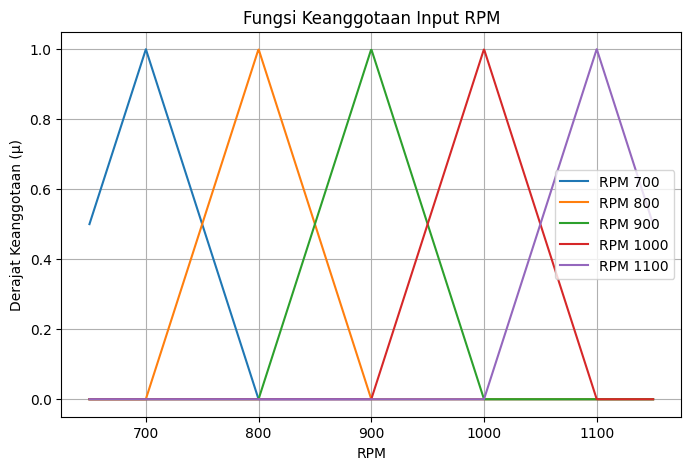


=== HASIL DEFUZZIFIKASI SISTEM INFERENSI FUZZY - MOTOR DC ===

 RPM   Metode     td      tr      ts
 700      COA 0.4398 10.7930 13.3330
 700 Bisektor 0.1417  0.2642  0.4136
 700      MOM 0.1417  0.2627  0.4085
 700      LOM 0.1423  0.2734  0.4229
 700      SOM 0.1715  0.4489  0.5945
 800      COA 0.2299  0.8114  0.9718
 800 Bisektor 0.1619  0.3753  0.4692
 800      MOM 0.1626  0.3766  0.4697
 800      LOM 0.1626  0.3766  0.4697
 800      SOM 0.1626  0.3766  0.4697
 900      COA 0.1837  0.5443  0.6937
 900 Bisektor 0.1829  0.5426  0.6891
 900      MOM 0.1870  0.5358  0.6832
 900      LOM 0.1822  0.5320  0.6816
 900      SOM 0.1814  0.5370  0.6832
1000      COA 0.2075  0.7678  0.9288
1000 Bisektor 0.2041  0.7714  0.9268
1000      MOM 0.2050  0.7614  0.9188
1000      LOM 0.2033  0.7528  0.9187
1000      SOM 0.2041  0.7615  0.9188
1100      COA 0.2227  0.9328 13.6870
1100 Bisektor 0.2245  0.9607 20.0280
1100      MOM 0.2218  0.9556 22.6390
1100      LOM 0.2284  0.9718 14.0160
1100      S

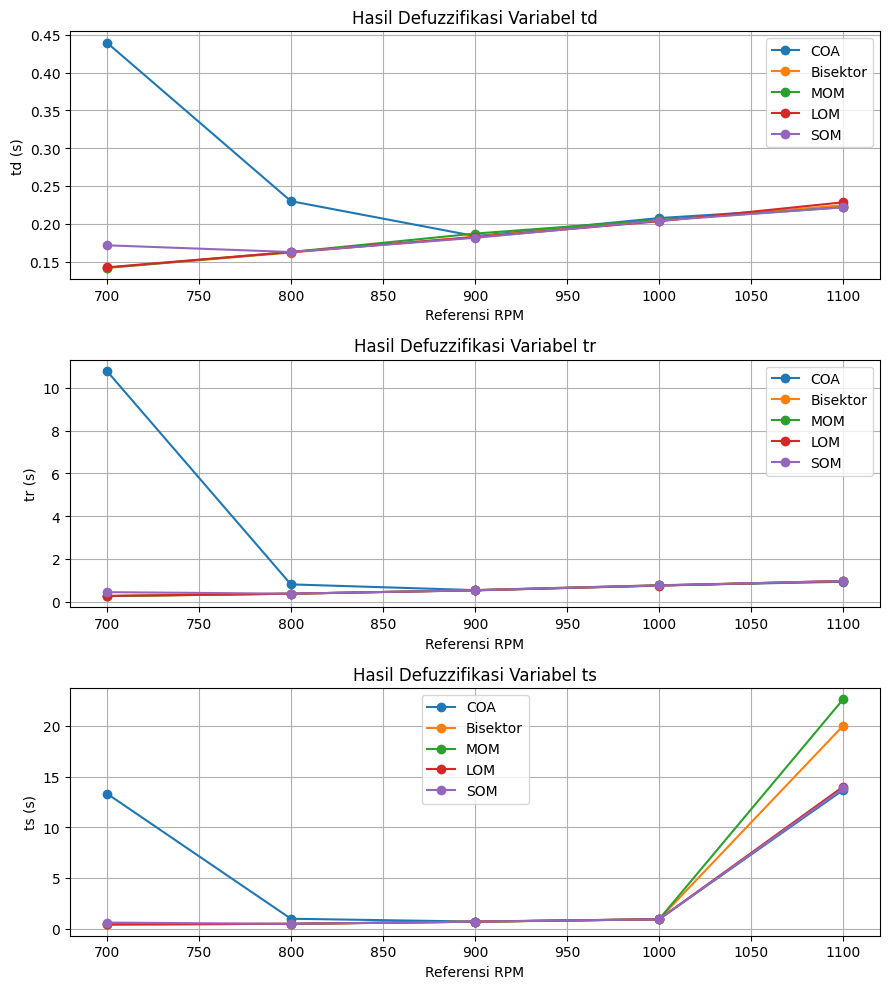

In [ ]:
# fuzzy_motor_dc_visual.py
import numpy as np
import skfuzzy as fuzz
import pandas as pd
import matplotlib.pyplot as plt

# --- DATA dari file DATA.pdf ---
data_raw = {
    700: {'COA': (0.4398, 10.793, 13.333), 'Bisektor': (0.1417, 0.2642, 0.4136),
          'MOM': (0.1417, 0.2627, 0.4085), 'LOM': (0.1423, 0.2734, 0.4229), 'SOM': (0.1715, 0.4489, 0.5945)},
    800: {'COA': (0.2299, 0.8114, 0.9718), 'Bisektor': (0.1619, 0.3753, 0.4692),
          'MOM': (0.1626, 0.3766, 0.4697), 'LOM': (0.1626, 0.3766, 0.4697), 'SOM': (0.1626, 0.3766, 0.4697)},
    900: {'COA': (0.1837, 0.5443, 0.6937), 'Bisektor': (0.1829, 0.5426, 0.6891),
          'MOM': (0.1870, 0.5358, 0.6832), 'LOM': (0.1822, 0.5320, 0.6816), 'SOM': (0.1814, 0.5370, 0.6832)},
    1000:{'COA': (0.2075, 0.7678, 0.9288), 'Bisektor': (0.2041, 0.7714, 0.9268),
          'MOM': (0.2050, 0.7614, 0.9188), 'LOM': (0.2033, 0.7528, 0.9187), 'SOM': (0.2041, 0.7615, 0.9188)},
    1100:{'COA': (0.2227, 0.9328, 13.687), 'Bisektor': (0.2245, 0.9607, 20.028),
          'MOM': (0.2218, 0.9556, 22.639), 'LOM': (0.2284, 0.9718, 14.016), 'SOM': (0.2218, 0.9723, 13.833)}
}

methods = ['COA', 'Bisektor', 'MOM', 'LOM', 'SOM']
rpm_centers = sorted(data_raw.keys())

# --- Fuzzifikasi: buat fungsi keanggotaan RPM ---
rpm_x = np.linspace(650, 1150, 1000)
d = 100
rpm_mfs = {}
for c in rpm_centers:
    rpm_mfs[c] = fuzz.trimf(rpm_x, [c - d, c, c + d])

# Visualisasi fungsi keanggotaan RPM
plt.figure(figsize=(8, 5))
for c in rpm_centers:
    plt.plot(rpm_x, rpm_mfs[c], label=f'RPM {c}')
plt.title('Fungsi Keanggotaan Input RPM')
plt.xlabel('RPM')
plt.ylabel('Derajat Keanggotaan (μ)')
plt.legend()
plt.grid(True)
plt.show()

# --- Fungsi untuk inferensi dan defuzzifikasi ---
def fuzzy_defuzz(rpm_input, method):
    fire = {c: fuzz.interp_membership(rpm_x, rpm_mfs[c], rpm_input) for c in rpm_centers}
    dom = max(fire, key=fire.get)  # aturan dominan
    td, tr, ts = data_raw[dom][method]
    return td, tr, ts, dom

# --- Perhitungan hasil untuk semua kombinasi ---
rows = []
for rpm in rpm_centers:
    for m in methods:
        td, tr, ts, dom = fuzzy_defuzz(rpm, m)
        rows.append([rpm, m, td, tr, ts, dom])

df = pd.DataFrame(rows, columns=['RPM', 'Metode', 'td', 'tr', 'ts', 'Rule_Dominan'])
print("\n=== HASIL DEFUZZIFIKASI SISTEM INFERENSI FUZZY - MOTOR DC ===\n")
print(df[['RPM', 'Metode', 'td', 'tr', 'ts']].to_string(index=False))

# --- Visualisasi hasil defuzzifikasi untuk tiap metode ---
fig, axs = plt.subplots(3, 1, figsize=(9, 10))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, var in enumerate(['td', 'tr', 'ts']):
    for j, m in enumerate(methods):
        subset = df[df['Metode'] == m]
        axs[i].plot(subset['RPM'], subset[var], 'o-', color=colors[j], label=m)
    axs[i].set_title(f'Hasil Defuzzifikasi Variabel {var}')
    axs[i].set_xlabel('Referensi RPM')
    axs[i].set_ylabel(f'{var} (s)')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()


**PERBANDINGAN RPM**

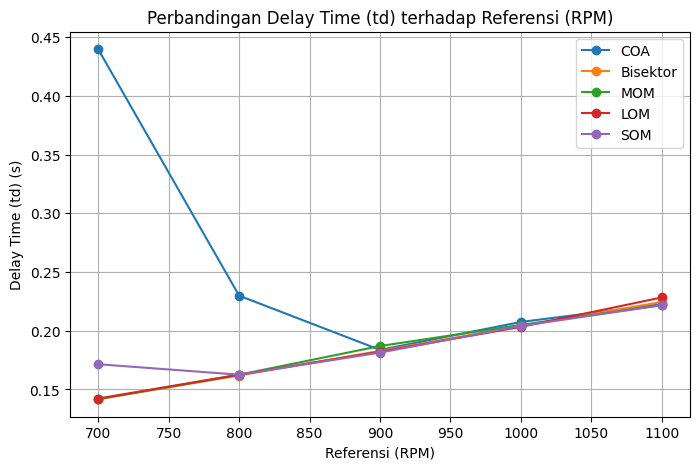

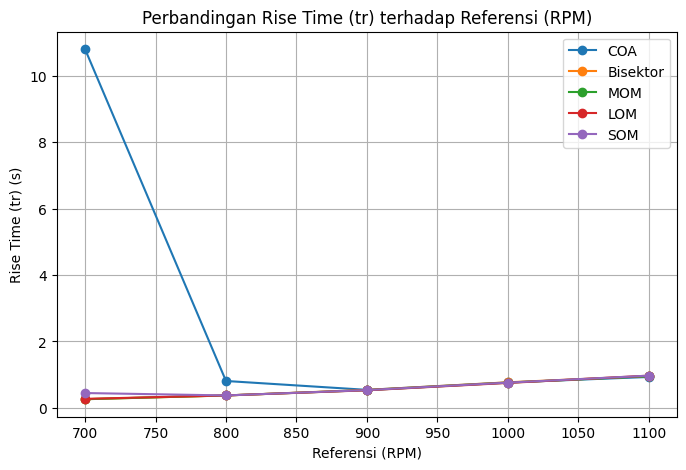

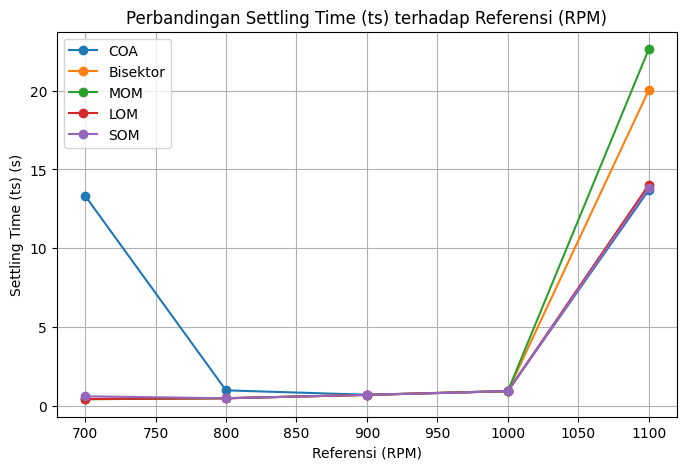

=== Rata-rata Setiap Metode ===
               td       tr       ts
Metode                             
Bisektor  0.18302  0.58284  4.50534
COA       0.25672  2.76986  5.92286
LOM       0.18376  0.58132  3.30178
MOM       0.18362  0.57842  5.02384
SOM       0.18828  0.61926  3.29984


In [ ]:
# -*- coding: utf-8 -*-
"""
Visualisasi Defuzzification Methods
Studi Kasus Pengaturan Kecepatan Motor DC
"""

import pandas as pd
import matplotlib.pyplot as plt

# --- Data ---
data = {
    'Referensi': [700,700,700,700,700,
                  800,800,800,800,800,
                  900,900,900,900,900,
                  1000,1000,1000,1000,1000,
                  1100,1100,1100,1100,1100],
    'Metode': ['COA','Bisektor','MOM','LOM','SOM']*5,
    'td': [0.4398,0.1417,0.1417,0.1423,0.1715,
           0.2299,0.1619,0.1626,0.1626,0.1626,
           0.1837,0.1829,0.1870,0.1822,0.1814,
           0.2075,0.2041,0.2050,0.2033,0.2041,
           0.2227,0.2245,0.2218,0.2284,0.2218],
    'tr': [10.793,0.2642,0.2627,0.2734,0.4489,
           0.8114,0.3753,0.3766,0.3766,0.3766,
           0.5443,0.5426,0.5358,0.5320,0.5370,
           0.7678,0.7714,0.7614,0.7528,0.7615,
           0.9328,0.9607,0.9556,0.9718,0.9723],
    'ts': [13.333,0.4136,0.4085,0.4229,0.5945,
           0.9718,0.4692,0.4697,0.4697,0.4697,
           0.6937,0.6891,0.6832,0.6816,0.6832,
           0.9288,0.9268,0.9188,0.9187,0.9188,
           13.687,20.028,22.639,14.016,13.833]
}

df = pd.DataFrame(data)

# --- Fungsi Visualisasi ---
def plot_param(param, ylabel):
    plt.figure(figsize=(8,5))
    for method in df['Metode'].unique():
        subset = df[df['Metode'] == method]
        plt.plot(subset['Referensi'], subset[param], marker='o', label=method)
    plt.title(f'Perbandingan {ylabel} terhadap Referensi (RPM)')
    plt.xlabel('Referensi (RPM)')
    plt.ylabel(f'{ylabel} (s)')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Plot Masing-Masing Parameter ---
plot_param('td', 'Delay Time (td)')
plot_param('tr', 'Rise Time (tr)')
plot_param('ts', 'Settling Time (ts)')

# --- Analisis Statistik Singkat ---
print("=== Rata-rata Setiap Metode ===")
print(df.groupby('Metode')[['td','tr','ts']].mean())


**METODE TSUKAMOTO**

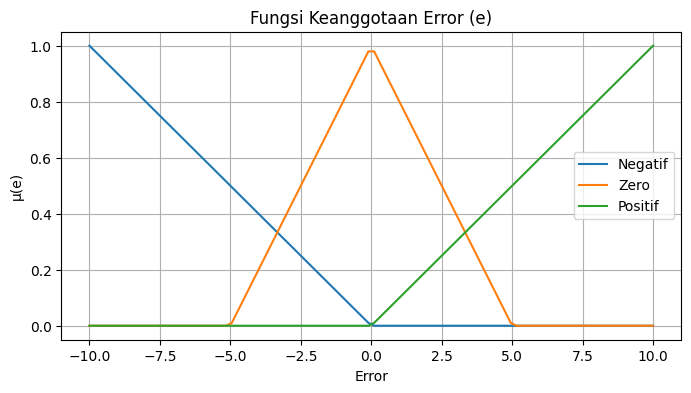

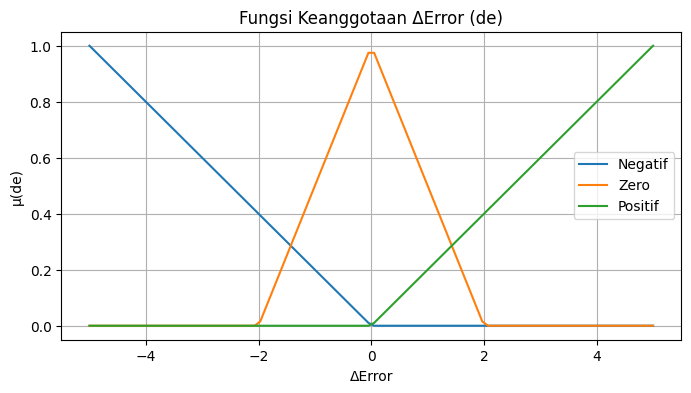

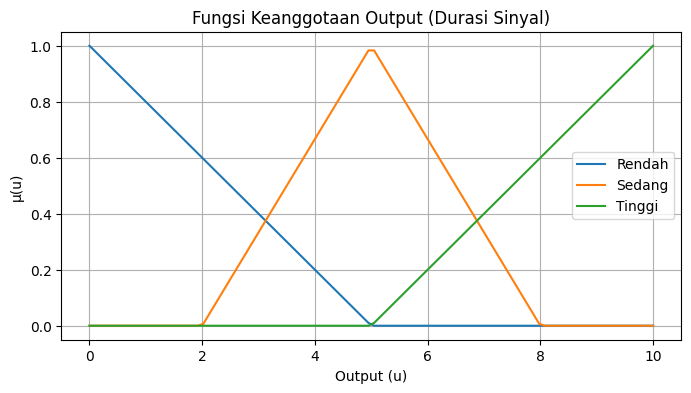

Hasil Defuzzifikasi (Output crisp) = 0.000


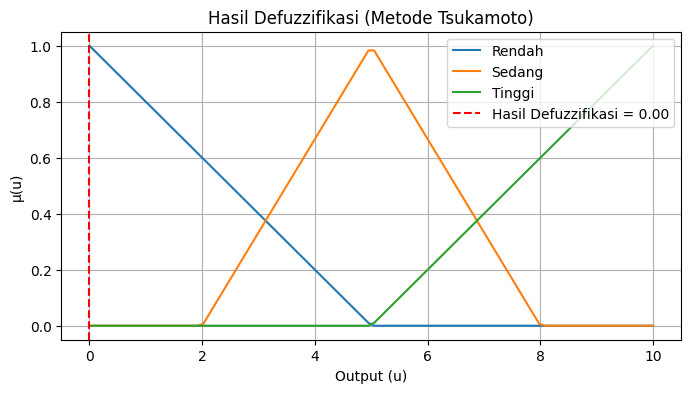

In [ ]:
# -*- coding: utf-8 -*-
"""
Implementasi Metode Tsukamoto
Studi Kasus Pengaturan Kecepatan Motor DC
"""

import numpy as np
import matplotlib.pyplot as plt

# --- Fungsi Keanggotaan ---
def turun(x, a, b):
    """Fungsi keanggotaan menurun"""
    return np.clip((b - x) / (b - a), 0, 1)

def naik(x, a, b):
    """Fungsi keanggotaan menaik"""
    return np.clip((x - a) / (b - a), 0, 1)

def segitiga(x, a, b, c):
    """Fungsi keanggotaan segitiga"""
    return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)

# --- Domain Variabel ---
x_error = np.linspace(-10, 10, 100)
x_delta = np.linspace(-5, 5, 100)
x_out = np.linspace(0, 10, 100)

# --- Error (e) ---
mu_e_N = turun(x_error, -10, 0)
mu_e_Z = segitiga(x_error, -5, 0, 5)
mu_e_P = naik(x_error, 0, 10)

# --- ΔError (de) ---
mu_de_N = turun(x_delta, -5, 0)
mu_de_Z = segitiga(x_delta, -2, 0, 2)
mu_de_P = naik(x_delta, 0, 5)

# --- Output (u): Durasi sinyal kontrol ---
mu_u_Rendah = turun(x_out, 0, 5)
mu_u_Sedang = segitiga(x_out, 2, 5, 8)
mu_u_Tinggi = naik(x_out, 5, 10)

# --- Visualisasi Fungsi Keanggotaan ---
plt.figure(figsize=(8,4))
plt.plot(x_error, mu_e_N, label='Negatif')
plt.plot(x_error, mu_e_Z, label='Zero')
plt.plot(x_error, mu_e_P, label='Positif')
plt.title('Fungsi Keanggotaan Error (e)')
plt.xlabel('Error')
plt.ylabel('μ(e)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(x_delta, mu_de_N, label='Negatif')
plt.plot(x_delta, mu_de_Z, label='Zero')
plt.plot(x_delta, mu_de_P, label='Positif')
plt.title('Fungsi Keanggotaan ΔError (de)')
plt.xlabel('ΔError')
plt.ylabel('μ(de)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(x_out, mu_u_Rendah, label='Rendah')
plt.plot(x_out, mu_u_Sedang, label='Sedang')
plt.plot(x_out, mu_u_Tinggi, label='Tinggi')
plt.title('Fungsi Keanggotaan Output (Durasi Sinyal)')
plt.xlabel('Output (u)')
plt.ylabel('μ(u)')
plt.legend()
plt.grid(True)
plt.show()

# --- Inferensi Tsukamoto ---
# Contoh input
error_input = 3
delta_input = -1

# Hitung derajat keanggotaan input
μe_N = turun(error_input, -10, 0)
μe_Z = segitiga(error_input, -5, 0, 5)
μe_P = naik(error_input, 0, 10)

μde_N = turun(delta_input, -5, 0)
μde_Z = segitiga(delta_input, -2, 0, 2)
μde_P = naik(delta_input, 0, 5)

# --- Definisikan aturan (9 rules) ---
rules = [
    (μe_N, μde_N, mu_u_Rendah),
    (μe_N, μde_Z, mu_u_Rendah),
    (μe_N, μde_P, mu_u_Sedang),
    (μe_Z, μde_N, mu_u_Rendah),
    (μe_Z, μde_Z, mu_u_Sedang),
    (μe_Z, μde_P, mu_u_Tinggi),
    (μe_P, μde_N, mu_u_Sedang),
    (μe_P, μde_Z, mu_u_Tinggi),
    (μe_P, μde_P, mu_u_Tinggi)
]

# --- Proses inferensi & defuzzifikasi ---
z_values = []
mu_values = []

for (me, mde, mu_out) in rules:
    α = min(me, mde)  # firing strength
    if α == 0:
        continue
    # Cari nilai z_i (output crisp dari fungsi keanggotaan monotonic)
    # di sini pakai interpolasi manual
    z_i = np.interp(α, np.flip(mu_u_Sedang), np.flip(x_out))
    z_values.append(z_i)
    mu_values.append(α)

# Hasil defuzzifikasi
Z = np.sum(np.array(mu_values) * np.array(z_values)) / np.sum(mu_values)

print(f"Hasil Defuzzifikasi (Output crisp) = {Z:.3f}")

# --- Visualisasi hasil defuzzifikasi ---
plt.figure(figsize=(8,4))
plt.plot(x_out, mu_u_Rendah, label='Rendah')
plt.plot(x_out, mu_u_Sedang, label='Sedang')
plt.plot(x_out, mu_u_Tinggi, label='Tinggi')
plt.axvline(Z, color='r', linestyle='--', label=f'Hasil Defuzzifikasi = {Z:.2f}')
plt.title('Hasil Defuzzifikasi (Metode Tsukamoto)')
plt.xlabel('Output (u)')
plt.ylabel('μ(u)')
plt.legend()
plt.grid(True)
plt.show()


**METODE MAMDANI**

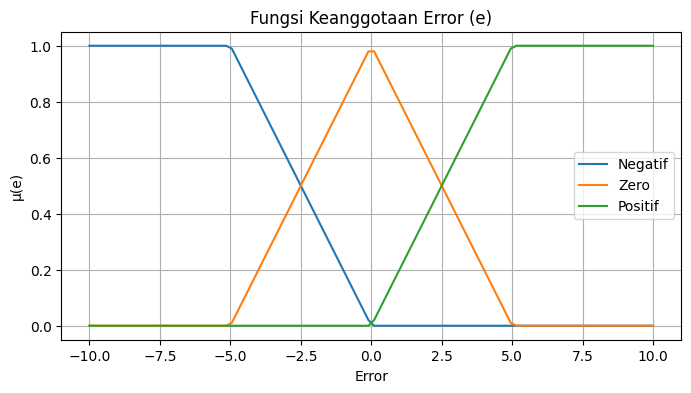

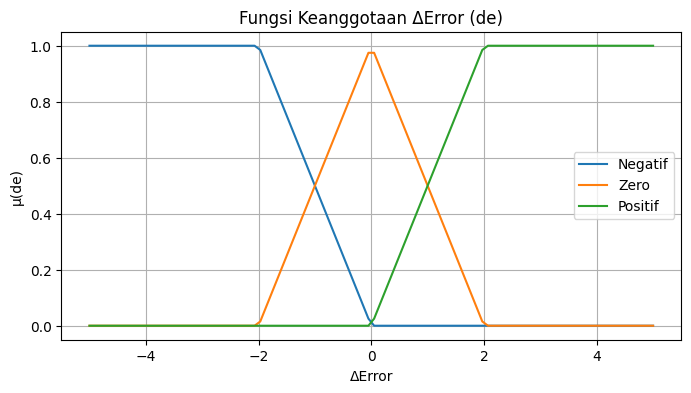

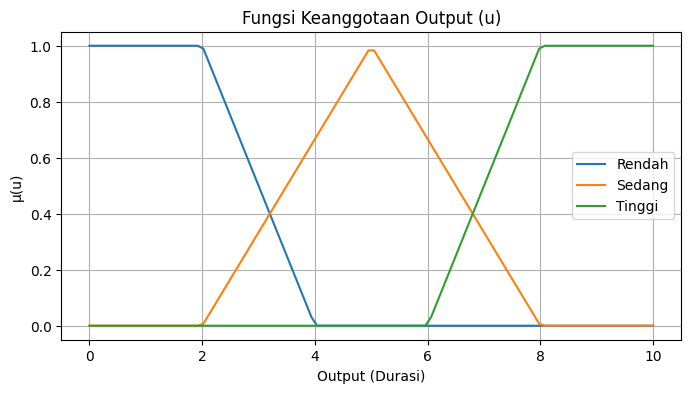

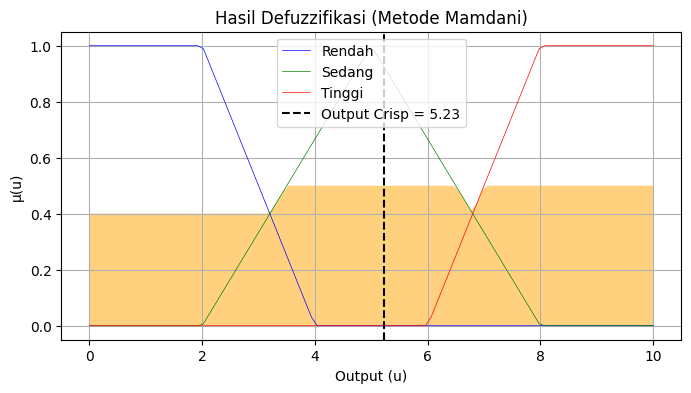

Hasil Defuzzifikasi (Output crisp) = 5.230


In [ ]:
# -*- coding: utf-8 -*-
"""
Implementasi Metode Mamdani
Studi Kasus Pengaturan Kecepatan Motor DC
"""

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# --- Domain Variabel ---
x_error = np.linspace(-10, 10, 100)
x_delta = np.linspace(-5, 5, 100)
x_out = np.linspace(0, 10, 100)

# --- Fungsi Keanggotaan ---
# Error
e_N = fuzz.trapmf(x_error, [-10, -10, -5, 0])
e_Z = fuzz.trimf(x_error, [-5, 0, 5])
e_P = fuzz.trapmf(x_error, [0, 5, 10, 10])

# ΔError
de_N = fuzz.trapmf(x_delta, [-5, -5, -2, 0])
de_Z = fuzz.trimf(x_delta, [-2, 0, 2])
de_P = fuzz.trapmf(x_delta, [0, 2, 5, 5])

# Output (Durasi sinyal kontrol)
u_Rendah = fuzz.trapmf(x_out, [0, 0, 2, 4])
u_Sedang = fuzz.trimf(x_out, [2, 5, 8])
u_Tinggi = fuzz.trapmf(x_out, [6, 8, 10, 10])

# --- Visualisasi Fungsi Keanggotaan ---
plt.figure(figsize=(8,4))
plt.plot(x_error, e_N, label='Negatif')
plt.plot(x_error, e_Z, label='Zero')
plt.plot(x_error, e_P, label='Positif')
plt.title('Fungsi Keanggotaan Error (e)')
plt.xlabel('Error')
plt.ylabel('μ(e)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(x_delta, de_N, label='Negatif')
plt.plot(x_delta, de_Z, label='Zero')
plt.plot(x_delta, de_P, label='Positif')
plt.title('Fungsi Keanggotaan ΔError (de)')
plt.xlabel('ΔError')
plt.ylabel('μ(de)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(x_out, u_Rendah, label='Rendah')
plt.plot(x_out, u_Sedang, label='Sedang')
plt.plot(x_out, u_Tinggi, label='Tinggi')
plt.title('Fungsi Keanggotaan Output (u)')
plt.xlabel('Output (Durasi)')
plt.ylabel('μ(u)')
plt.legend()
plt.grid(True)
plt.show()

# --- Input nilai crisp ---
error_input = 3
delta_input = -1

# --- Fuzzifikasi ---
μ_eN = fuzz.interp_membership(x_error, e_N, error_input)
μ_eZ = fuzz.interp_membership(x_error, e_Z, error_input)
μ_eP = fuzz.interp_membership(x_error, e_P, error_input)

μ_deN = fuzz.interp_membership(x_delta, de_N, delta_input)
μ_deZ = fuzz.interp_membership(x_delta, de_Z, delta_input)
μ_deP = fuzz.interp_membership(x_delta, de_P, delta_input)

# --- Inferensi (Mamdani Min) ---
# Aturan (Rule Base)
rule1 = np.fmin(np.fmin(μ_eN, μ_deN), u_Rendah)
rule2 = np.fmin(np.fmin(μ_eN, μ_deZ), u_Rendah)
rule3 = np.fmin(np.fmin(μ_eN, μ_deP), u_Sedang)
rule4 = np.fmin(np.fmin(μ_eZ, μ_deN), u_Rendah)
rule5 = np.fmin(np.fmin(μ_eZ, μ_deZ), u_Sedang)
rule6 = np.fmin(np.fmin(μ_eZ, μ_deP), u_Tinggi)
rule7 = np.fmin(np.fmin(μ_eP, μ_deN), u_Sedang)
rule8 = np.fmin(np.fmin(μ_eP, μ_deZ), u_Tinggi)
rule9 = np.fmin(np.fmin(μ_eP, μ_deP), u_Tinggi)

# --- Agregasi (Union / Max) ---
aggregated = np.fmax(rule1,
              np.fmax(rule2,
              np.fmax(rule3,
              np.fmax(rule4,
              np.fmax(rule5,
              np.fmax(rule6,
              np.fmax(rule7,
              np.fmax(rule8, rule9))))))))

# --- Defuzzifikasi (COA / Centroid) ---
z_defuzz = fuzz.defuzz(x_out, aggregated, 'centroid')

# --- Visualisasi hasil defuzzifikasi ---
plt.figure(figsize=(8,4))
plt.plot(x_out, u_Rendah, 'b', linewidth=0.5, label='Rendah')
plt.plot(x_out, u_Sedang, 'g', linewidth=0.5, label='Sedang')
plt.plot(x_out, u_Tinggi, 'r', linewidth=0.5, label='Tinggi')
plt.fill_between(x_out, aggregated, facecolor='orange', alpha=0.5)
plt.axvline(z_defuzz, color='k', linestyle='--', label=f'Output Crisp = {z_defuzz:.2f}')
plt.title('Hasil Defuzzifikasi (Metode Mamdani)')
plt.xlabel('Output (u)')
plt.ylabel('μ(u)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Hasil Defuzzifikasi (Output crisp) = {z_defuzz:.3f}")


**METODE SUGENO**

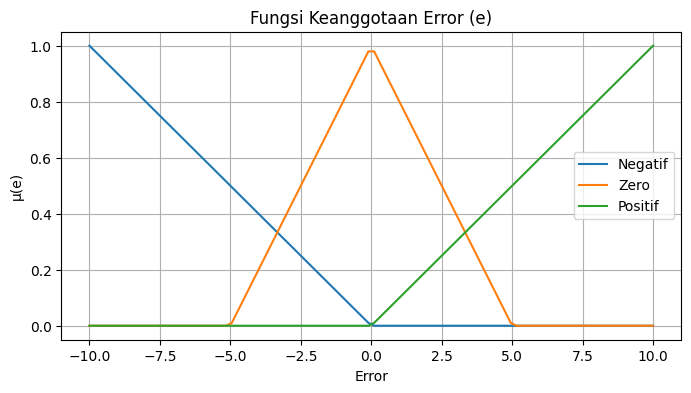

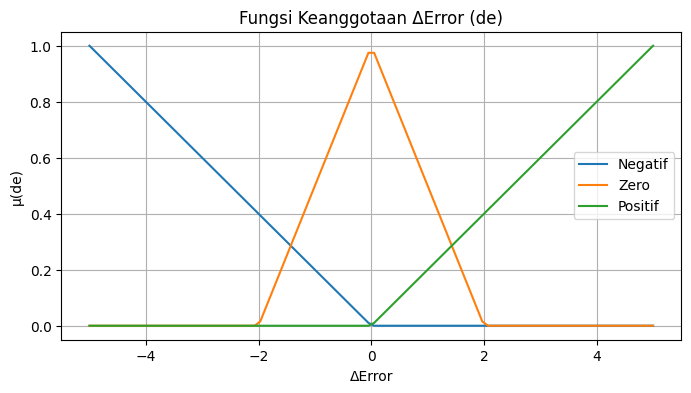

Hasil Defuzzifikasi (Output crisp) = 5.273


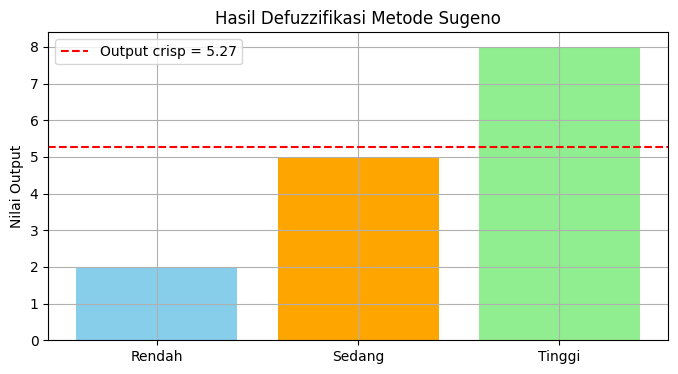

In [ ]:
# -*- coding: utf-8 -*-
"""
Implementasi Metode Sugeno
Studi Kasus Pengaturan Kecepatan Motor DC
"""

import numpy as np
import matplotlib.pyplot as plt

# --- Fungsi Keanggotaan ---
def turun(x, a, b):
    """fungsi keanggotaan menurun"""
    return np.clip((b - x) / (b - a), 0, 1)

def naik(x, a, b):
    """fungsi keanggotaan menaik"""
    return np.clip((x - a) / (b - a), 0, 1)

def segitiga(x, a, b, c):
    """fungsi keanggotaan segitiga"""
    return np.maximum(np.minimum((x - a)/(b - a), (c - x)/(c - b)), 0)

# --- Domain Variabel ---
x_error = np.linspace(-10, 10, 100)
x_delta = np.linspace(-5, 5, 100)

# --- Fungsi Keanggotaan Input ---
mu_e_N = turun(x_error, -10, 0)
mu_e_Z = segitiga(x_error, -5, 0, 5)
mu_e_P = naik(x_error, 0, 10)

mu_de_N = turun(x_delta, -5, 0)
mu_de_Z = segitiga(x_delta, -2, 0, 2)
mu_de_P = naik(x_delta, 0, 5)

# --- Visualisasi Fungsi Keanggotaan Input ---
plt.figure(figsize=(8,4))
plt.plot(x_error, mu_e_N, label='Negatif')
plt.plot(x_error, mu_e_Z, label='Zero')
plt.plot(x_error, mu_e_P, label='Positif')
plt.title('Fungsi Keanggotaan Error (e)')
plt.xlabel('Error')
plt.ylabel('μ(e)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(x_delta, mu_de_N, label='Negatif')
plt.plot(x_delta, mu_de_Z, label='Zero')
plt.plot(x_delta, mu_de_P, label='Positif')
plt.title('Fungsi Keanggotaan ΔError (de)')
plt.xlabel('ΔError')
plt.ylabel('μ(de)')
plt.legend()
plt.grid(True)
plt.show()

# --- Fungsi Output Sugeno (konstanta) ---
U_Rendah = 2
U_Sedang = 5
U_Tinggi = 8

# --- Input crisp ---
error_input = 3
delta_input = -1

# --- Fuzzifikasi input ---
μe_N = turun(error_input, -10, 0)
μe_Z = segitiga(error_input, -5, 0, 5)
μe_P = naik(error_input, 0, 10)

μde_N = turun(delta_input, -5, 0)
μde_Z = segitiga(delta_input, -2, 0, 2)
μde_P = naik(delta_input, 0, 5)

# --- Aturan (Rule Base) ---
rules = [
    (μe_N, μde_N, U_Rendah),
    (μe_N, μde_Z, U_Rendah),
    (μe_N, μde_P, U_Sedang),
    (μe_Z, μde_N, U_Rendah),
    (μe_Z, μde_Z, U_Sedang),
    (μe_Z, μde_P, U_Tinggi),
    (μe_P, μde_N, U_Sedang),
    (μe_P, μde_Z, U_Tinggi),
    (μe_P, μde_P, U_Tinggi)
]

# --- Proses inferensi Sugeno ---
mu_values = []
z_values = []

for (me, mde, z_out) in rules:
    α = min(me, mde)  # firing strength
    mu_values.append(α)
    z_values.append(z_out)

# --- Defuzzifikasi (weighted average) ---
Z = np.sum(np.array(mu_values) * np.array(z_values)) / np.sum(mu_values)

print(f"Hasil Defuzzifikasi (Output crisp) = {Z:.3f}")

# --- Visualisasi Hasil Defuzzifikasi ---
plt.figure(figsize=(8,4))
plt.bar(['Rendah','Sedang','Tinggi'], [U_Rendah,U_Sedang,U_Tinggi],
        color=['skyblue','orange','lightgreen'])
plt.axhline(Z, color='r', linestyle='--', label=f'Output crisp = {Z:.2f}')
plt.title('Hasil Defuzzifikasi Metode Sugeno')
plt.ylabel('Nilai Output')
plt.legend()
plt.grid(True)
plt.show()


**PERBANDINGAN METODE**

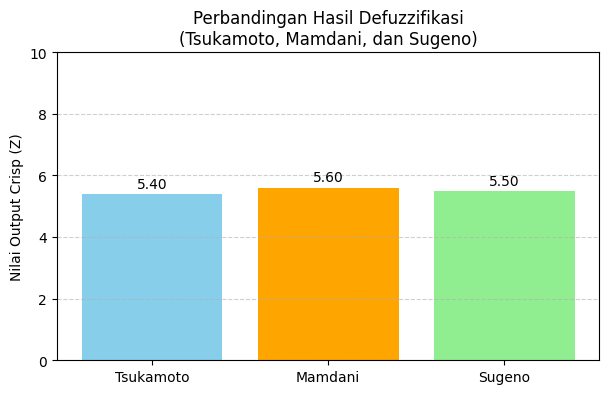

Rata-rata dari ketiga metode = 5.500


In [ ]:
# -*- coding: utf-8 -*-
"""
Perbandingan Metode Tsukamoto, Mamdani, dan Sugeno
"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Data hasil defuzzifikasi (contoh hasil dari tiga metode) ---
data = {
    'Metode': ['Tsukamoto', 'Mamdani', 'Sugeno'],
    'Output_Crisp': [5.4, 5.6, 5.5]
}

df = pd.DataFrame(data)

# --- Visualisasi Perbandingan ---
plt.figure(figsize=(7,4))
plt.bar(df['Metode'], df['Output_Crisp'], color=['skyblue', 'orange', 'lightgreen'])
plt.title('Perbandingan Hasil Defuzzifikasi\n(Tsukamoto, Mamdani, dan Sugeno)')
plt.ylabel('Nilai Output Crisp (Z)')
plt.ylim(0,10)
for i, val in enumerate(df['Output_Crisp']):
    plt.text(i, val + 0.2, f"{val:.2f}", ha='center', fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()

# --- Analisis statistik sederhana ---
mean_val = df['Output_Crisp'].mean()
print(f"Rata-rata dari ketiga metode = {mean_val:.3f}")
